In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio

## The HDF5 event files
The dataframes (called 'Particles') are stored in HDF5 files. There is one file for simulated 2vbb events, and one file for simulated background events. The backrounds simulated are Tl208, Bi214, Co60, and K40.

For the backgrounds, there is one entry per event, and for 2vbb, there are two entries per event (one for each primary electron). All of the 2vbb events can be keyed by the 'event' attribute, which is unique.

In [36]:
'''
Load in dataframes:
'''

fname = '../files/Xe2nu_NEW_1d.h5'
##bgfname = './files/BG_NEW_1d.h5'
df_particles = pd.read_hdf(fname, 'Particles')
##df_bgparticles = pd.read_hdf(bgfname, 'Particles')

In [37]:
df_particles.columns

Index(['particle_indx', 'particle_name', 'primary', 'kin_energy', 'initial_x',
       'initial_y', 'initial_z', 'final_x', 'final_y', 'final_z', 'momentum_x',
       'momentum_y', 'momentum_z', 'momentum', 'event', 'evt_energy',
       'opening_angle', 'nS2', 'reco_energy', 'reco_length',
       'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min',
       'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max',
       'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave',
       'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z',
       'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x',
       'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y',
       'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy'],
      dtype='object')

In [38]:
'''
Look at which variables are stored in 2vbb the dataframe:
'''
print('True MC 2vbb variables:')
print(df_particles.columns.tolist()[:17])
print()
print('Reconstructed 2vbb variables:')
print(df_particles.columns.tolist()[17:])

True MC 2vbb variables:
['particle_indx', 'particle_name', 'primary', 'kin_energy', 'initial_x', 'initial_y', 'initial_z', 'final_x', 'final_y', 'final_z', 'momentum_x', 'momentum_y', 'momentum_z', 'momentum', 'event', 'evt_energy', 'opening_angle']

Reconstructed 2vbb variables:
['nS2', 'reco_energy', 'reco_length', 'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min', 'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max', 'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave', 'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z', 'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x', 'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y', 'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy']


In [39]:
'''
Look at which variables are stored in backgrounds the dataframe:
'''
##print('True MC bg variables:')
##print(df_bgparticles.columns.tolist()[:8])
##print()
##print('Reconstructed bg variables:')
##print(df_bgparticles.columns.tolist()[8:])

'\nLook at which variables are stored in backgrounds the dataframe:\n'

# Analysis cuts:
Recreate the NEXT NEW 2vbb analysis cuts:<br>
<img src="images/slide_procedure.png" width=600><br>
From Alberto's CM slides: <br>
https://next.ific.uv.es/DocDB/0009/000981/001/MC-data_efficiencies_studies_MC_november.pdf

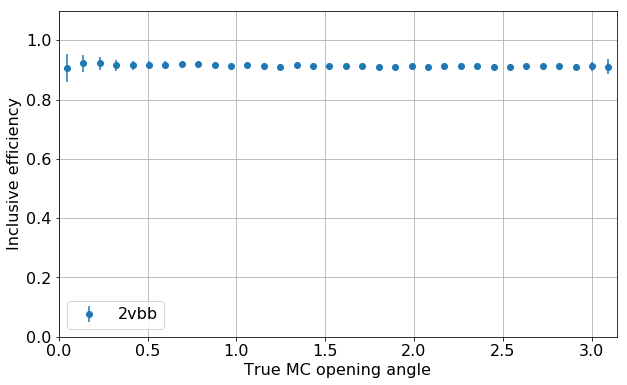

In [58]:
'''
Inclusive: (nS2 == 1)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(0,3.141592653589793,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut1 = df_particles[df_particles['nS2'] == 1]
##df_bgparticles_cut1 = df_bgparticles[df_bgparticles['nS2'] == 1]

energy_counts,_ = np.histogram(df_particles.groupby('event')['opening_angle'].first(), bins=ebins)
energy_counts_ns2,_ = np.histogram(df_particles_cut1.groupby('event')['opening_angle'].first(), bins=ebins)

##bgenergy_counts,_ = np.histogram(df_bgparticles['reco_energy'], bins=ebins)
##bgenergy_counts_ns2,_ = np.histogram(df_bgparticles_cut1['reco_energy'], bins=ebins)

ratio_ns2 = energy_counts_ns2/energy_counts
ratio_ns2_std = ratio_ns2 * np.sqrt(1./energy_counts_ns2 + 1./energy_counts)

##bgratio_ns2 = bgenergy_counts_ns2/bgenergy_counts
##bgratio_ns2_std = bgratio_ns2 * np.sqrt(1./bgenergy_counts_ns2 + 1./bgenergy_counts)

plt.errorbar(bin_centers, ratio_ns2, yerr=ratio_ns2_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_ns2, yerr=bgratio_ns2_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(0.,3.141592653589793)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('True MC opening angle', fontsize=16)
plt.ylabel('Inclusive efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)

plt.savefig('inclusive efficiency plot.png', dpi=300, bbox_inches='tight')

No handles with labels found to put in legend.


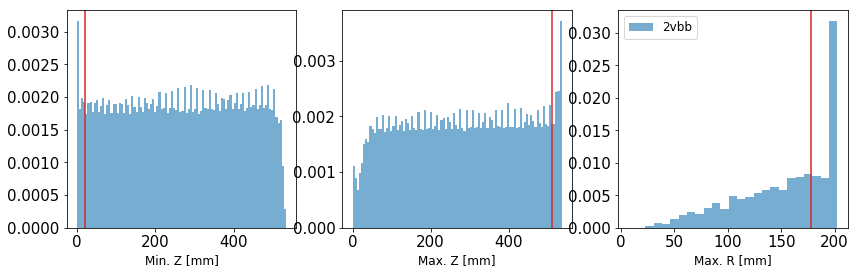

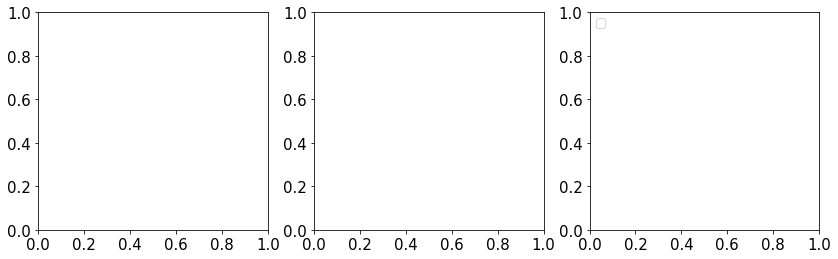

In [41]:
'''
Fiducial: (Zmin > 20 mm)&(Zmax < mm)&(Rmax < 178 mm)
'''

fig, ax = plt.subplots(ncols=3, figsize=(14,4))

ax[0].hist(df_particles_cut1.groupby('event')['reco_z_min'].first(), bins=100, color='C0', alpha=0.6, density=True);
ax[0].axvline(20, color='C3')

ax[1].hist(df_particles_cut1.groupby('event')['reco_z_max'].first(), bins=100, color='C0', alpha=0.6, density=True);
ax[1].axvline(510, color='C3')

ax[2].hist(df_particles_cut1.groupby('event')['reco_r_max'].first(), bins=25, color='C0', alpha=0.6, density=True, label='2vbb');
ax[2].axvline(178, color='C3')

ax[0].set_xlabel('Min. Z [mm]', fontsize=12)
ax[1].set_xlabel('Max. Z [mm]', fontsize=12)
ax[2].set_xlabel('Max. R [mm]', fontsize=12)

ax[2].legend(loc='upper left', fontsize=12)


fig, ax = plt.subplots(ncols=3, figsize=(14,4))

##ax[0].hist(df_bgparticles_cut1.groupby('event')['reco_z_min'].first(), bins=100, color='C1', alpha=0.6, density=True);
##ax[0].axvline(20, color='C3')

##ax[1].hist(df_bgparticles_cut1.groupby('event')['reco_z_max'].first(), bins=100, color='C1', alpha=0.6, density=True);
##ax[1].axvline(510, color='C3')

##ax[2].hist(df_bgparticles_cut1.groupby('event')['reco_r_max'].first(), bins=25, color='C1', alpha=0.6, density=True, label='Backgrounds');
##ax[2].axvline(178, color='C3')

##ax[0].set_xlabel('Min. Z [mm]', fontsize=12)
##ax[1].set_xlabel('Max. Z [mm]', fontsize=12)
##ax[2].set_xlabel('Max. R [mm]', fontsize=12)

ax[2].legend(loc='upper left', fontsize=12)

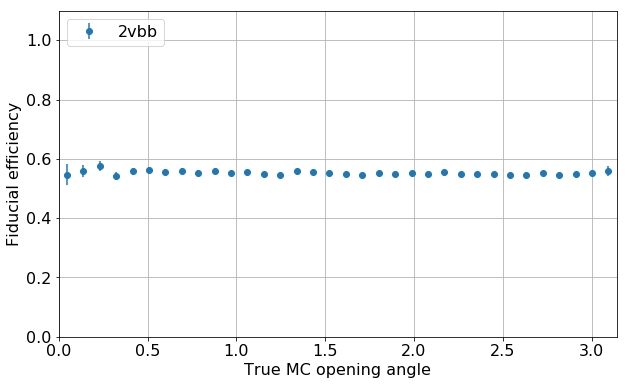

In [42]:
'''
Fiducial: (Zmin > 20 mm)&(Zmax < 510 mm)&(Rmax < 178 mm)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(0,3.141592653589793,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut2 = df_particles_cut1[(df_particles_cut1['reco_z_min'] > 20)&(df_particles_cut1['reco_z_max'] < 510)&(df_particles_cut1['reco_r_max'] < 178)]
##df_bgparticles_cut2 = df_bgparticles_cut1[(df_bgparticles_cut1['reco_z_min'] > 20)&(df_bgparticles_cut1['reco_z_max'] < 510)&(df_bgparticles_cut1['reco_r_max'] < 178)]

energy_counts_ns2,_ = np.histogram(df_particles_cut1.groupby('event')['opening_angle'].first(), bins=ebins)
energy_counts_fid,_ = np.histogram(df_particles_cut2.groupby('event')['opening_angle'].first(), bins=ebins)

##bgenergy_counts_ns2,_ = np.histogram(df_bgparticles_cut1['reco_energy'], bins=ebins)
##bgenergy_counts_fid,_ = np.histogram(df_bgparticles_cut2['reco_energy'], bins=ebins)

ratio_fid = energy_counts_fid/energy_counts_ns2
ratio_fid_std = ratio_fid * np.sqrt(1./energy_counts_fid + 1./energy_counts_ns2)

##bgratio_fid = bgenergy_counts_fid/bgenergy_counts
##bgratio_fid_std = bgratio_fid * np.sqrt(1./bgenergy_counts_fid + 1./bgenergy_counts)

plt.errorbar(bin_centers, ratio_fid, yerr=ratio_fid_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_fid, yerr=bgratio_fid_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(0,3.141592653589793)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('True MC opening angle', fontsize=16)
plt.ylabel('Fiducial efficiency', fontsize=16)

plt.legend(loc='upper left', fontsize=16)


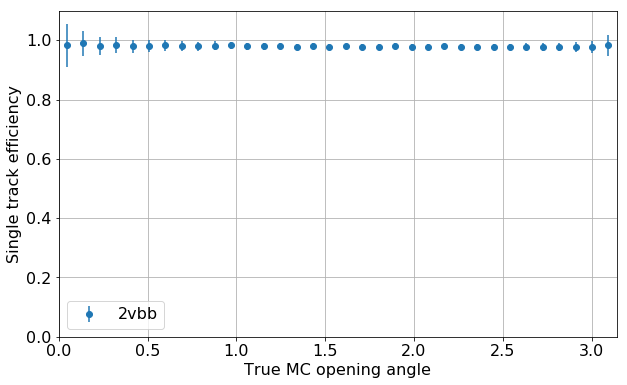

In [43]:
'''
Single track: (numb_of_tracks == 1)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(0,3.141592653589793,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut3 = df_particles_cut2[df_particles_cut2['reco_numb_of_tracks'] == 1]
##df_bgparticles_cut3 = df_bgparticles_cut2[df_bgparticles_cut2['reco_numb_of_tracks'] == 1]

energy_counts_fid,_ = np.histogram(df_particles_cut2.groupby('event')['opening_angle'].first(), bins=ebins)
energy_counts_1t,_ = np.histogram(df_particles_cut3.groupby('event')['opening_angle'].first(), bins=ebins)

##bgenergy_counts_fid,_ = np.histogram(df_bgparticles_cut2['reco_energy'], bins=ebins)
##bgenergy_counts_1t,_ = np.histogram(df_bgparticles_cut3['reco_energy'], bins=ebins)

ratio_1t = energy_counts_1t/energy_counts_fid
ratio_1t_std = ratio_1t * np.sqrt(1./energy_counts_1t + 1./energy_counts_fid)

##bgratio_1t = bgenergy_counts_1t/bgenergy_counts_fid
##bgratio_1t_std = bgratio_1t * np.sqrt(1./bgenergy_counts_1t + 1./bgenergy_counts_fid)

plt.errorbar(bin_centers, ratio_1t, yerr=ratio_1t_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_1t, yerr=bgratio_1t_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(0.,3.141592653589793)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('True MC opening angle', fontsize=16)
plt.ylabel('Single track efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


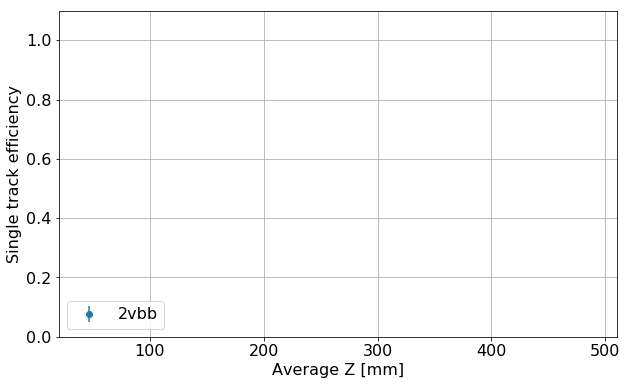

In [44]:
'''
Single track: (numb_of_tracks == 1)   ##THIS ONE SHOULDNT BE AFFECTED BY THE OPENING ANLGE SO THAT EXPLAINS THE BLANK PLOT BELOW
'''

plt.figure(figsize=(10,6))

zbins = np.linspace(20,510,35)
bin_centers = (zbins[:-1] + zbins[1:])/2.

z_counts_fid,_ = np.histogram(df_particles_cut2.groupby('event')['opening_angle'].first(), bins=zbins)
z_counts_1t,_ = np.histogram(df_particles_cut3.groupby('event')['opening_angle'].first(), bins=zbins)

##z_bgcounts_fid,_ = np.histogram(df_bgparticles_cut2.groupby('event')['reco_z_ave'].first(), bins=zbins)
##z_bgcounts_1t,_ = np.histogram(df_bgparticles_cut3.groupby('event')['reco_z_ave'].first(), bins=zbins)

ratio_1t = z_counts_1t/z_counts_fid
ratio_1t_std = ratio_1t * np.sqrt(1./z_counts_1t + 1./z_counts_fid)

##bgratio_1t = z_bgcounts_1t/z_bgcounts_fid
##bgratio_1t_std = bgratio_1t * np.sqrt(1./z_bgcounts_1t + 1./z_bgcounts_fid)

plt.errorbar(bin_centers, ratio_1t, yerr=ratio_1t_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_1t, yerr=bgratio_1t_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(20.,510.)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Average Z [mm]', fontsize=16)
plt.ylabel('Single track efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)


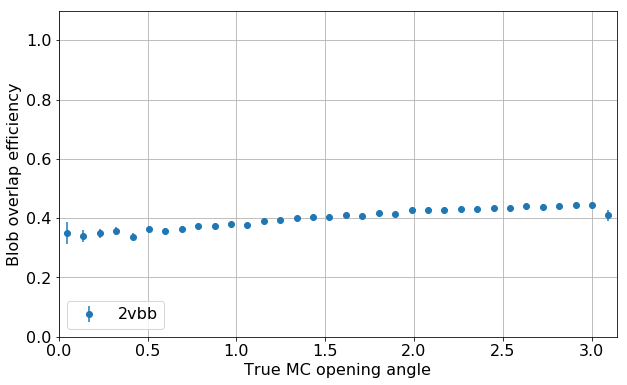

In [45]:
'''
Overlapped blob energy: (ovlp_blob == 0.0)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(0,3.141592653589793,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut4 = df_particles_cut3[df_particles_cut3['reco_ovlp_blob_energy'] == 0.0]
##df_bgparticles_cut4 = df_bgparticles_cut3[df_bgparticles_cut3['reco_ovlp_blob_energy'] == 0.0]

energy_counts_1t,_ = np.histogram(df_particles_cut3.groupby('event')['opening_angle'].first(), bins=ebins)
energy_counts_ovrl,_ = np.histogram(df_particles_cut4.groupby('event')['opening_angle'].first(), bins=ebins)

##bgenergy_counts_1t,_ = np.histogram(df_bgparticles_cut3.groupby('event')['reco_energy'].first(), bins=ebins)
##bgenergy_counts_ovrl,_ = np.histogram(df_bgparticles_cut4.groupby('event')['reco_energy'].first(), bins=ebins)

ratio_ovrl = energy_counts_ovrl/energy_counts_1t
ratio_ovrl_std = ratio_ovrl * np.sqrt(1./energy_counts_ovrl + 1./energy_counts_1t)

##bgratio_ovrl = bgenergy_counts_ovrl/bgenergy_counts_1t
##bgratio_ovrl_std = bgratio_ovrl * np.sqrt(1./bgenergy_counts_ovrl + 1./bgenergy_counts_1t)

plt.errorbar(bin_centers, ratio_ovrl, yerr=ratio_ovrl_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_ovrl, yerr=bgratio_ovrl_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(0.,3.141592653589793)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('True MC opening angle', fontsize=16)
plt.ylabel('Blob overlap efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)
plt.savefig('blob overlap efficiency.png', dpi=300, bbox_inches='tight')

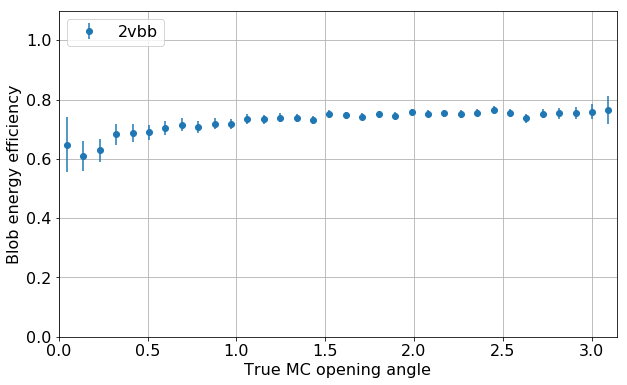

In [46]:
'''
Blob energy: (eblob2 > Ethreshold)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(0,3.141592653589793,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut5 = df_particles_cut4[df_particles_cut4['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles_cut4['reco_energy']*1000))]
##df_bgparticles_cut5 = df_bgparticles_cut4[df_bgparticles_cut4['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_bgparticles_cut4['reco_energy']*1000))]

energy_counts_ovrl,_ = np.histogram(df_particles_cut4.groupby('event')['opening_angle'].first(), bins=ebins)
energy_counts_blob,_ = np.histogram(df_particles_cut5.groupby('event')['opening_angle'].first(), bins=ebins)

##bgenergy_counts_ovrl,_ = np.histogram(df_bgparticles_cut4.groupby('event')['reco_energy'].first(), bins=ebins)
##bgenergy_counts_blob,_ = np.histogram(df_bgparticles_cut5.groupby('event')['reco_energy'].first(), bins=ebins)

ratio_blob = energy_counts_blob/energy_counts_ovrl
ratio_blob_std = ratio_blob * np.sqrt(1./energy_counts_blob + 1./energy_counts_ovrl)

##bgratio_blob = bgenergy_counts_blob/bgenergy_counts_ovrl
##bgratio_blob_std = bgratio_blob * np.sqrt(1./bgenergy_counts_blob + 1./bgenergy_counts_ovrl)

plt.errorbar(bin_centers, ratio_blob, yerr=ratio_blob_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_blob, yerr=bgratio_blob_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(0.,3.141592653589793)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('True MC opening angle', fontsize=16)
plt.ylabel('Blob energy efficiency', fontsize=16)

plt.legend(loc='upper left', fontsize=16)

plt.savefig('blob energy efficiency.png', dpi=300, bbox_inches='tight')  #plt.savefig('path-to-file/filename') use this shit next time to save

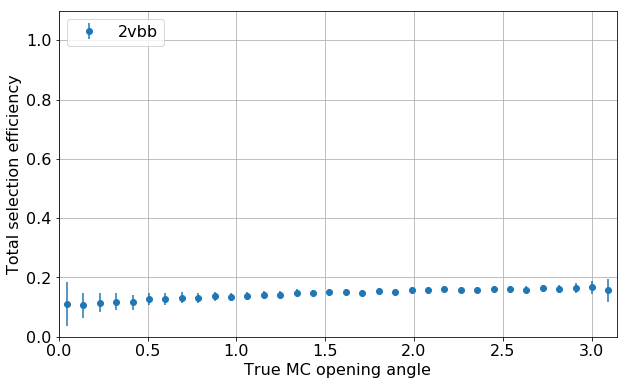

In [56]:
plt.figure(figsize=(10,6))

ebins = np.linspace(0,3.141592653589793,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

energy_counts,_ = np.histogram(df_particles.groupby('event')['opening_angle'].first(), bins=ebins)
energy_counts_blob,_ = np.histogram(df_particles_cut5.groupby('event')['opening_angle'].first(), bins=ebins)

##bgenergy_counts,_ = np.histogram(df_bgparticles.groupby('event')['reco_energy'].first(), bins=ebins)
##bgenergy_counts_blob,_ = np.histogram(df_bgparticles_cut5.groupby('event')['reco_energy'].first(), bins=ebins)

ratio_final = energy_counts_blob/energy_counts
ratio_final_std = ratio_blob * np.sqrt(1./energy_counts_blob + 1./energy_counts)

##bgratio_final = bgenergy_counts_blob/bgenergy_counts
##bgratio_final_std = bgratio_blob * np.sqrt(1./bgenergy_counts_blob + 1./bgenergy_counts)

plt.errorbar(bin_centers, ratio_final, yerr=ratio_final_std, fmt='o', label='2vbb')
##plt.errorbar(bin_centers, bgratio_final, yerr=bgratio_final_std, fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(0.,3.141592653589793)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('True MC opening angle', fontsize=16)
plt.ylabel('Total selection efficiency', fontsize=16)

plt.legend(loc='upper left', fontsize=16)

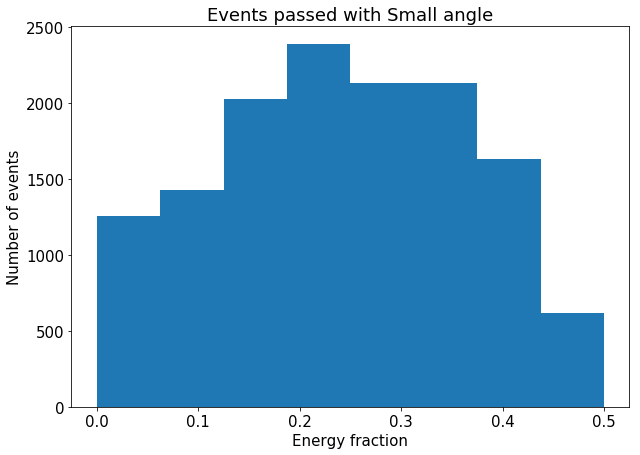

In [51]:
#pass small angle cut (aka p sac)
p_sac = df_particles[(df_particles['opening_angle'] < 1 ) & (df_particles['nS2'] == 1) & (df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178) & (df_particles['reco_numb_of_tracks'] == 1) & (df_particles['reco_ovlp_blob_energy'] == 0.0) & (df_particles['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]

hist_small_pass = p_sac.groupby('event')['kin_energy'].min()/p_sac.groupby('event')['evt_energy'].min() ##p_sac['kin_energy']/p_sac['evt_energy']

value_list_1 = hist_small_pass.tolist()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
plt.title('Events passed with Small angle')

x = [value_list_1]
plt.ylabel('Number of events')
plt.xlabel('Energy fraction')
plt.hist(x, bins = 8)
plt.savefig('Events passed with Small angle.png', dpi=300, bbox_inches='tight')
plt.show()


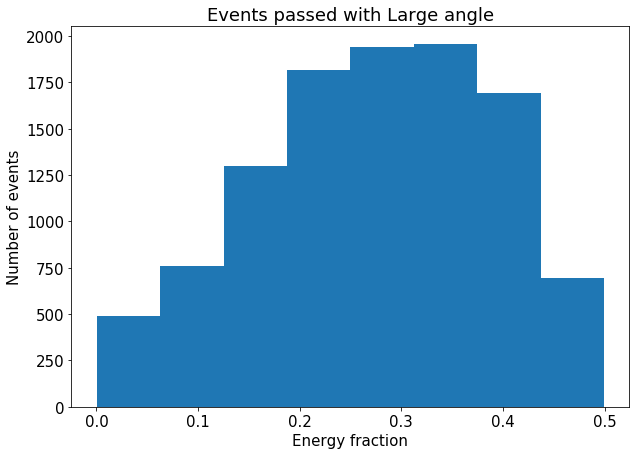

In [52]:
#pass large angle cut 
p_lac = df_particles[(df_particles['opening_angle'] > 2.7 ) & (df_particles['nS2'] == 1) & (df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178) & (df_particles['reco_numb_of_tracks'] == 1) & (df_particles['reco_ovlp_blob_energy'] == 0.0) & (df_particles['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]

hist_large_pass = p_lac.groupby('event')['kin_energy'].min()/p_lac.groupby('event')['evt_energy'].min() ##p_lac['kin_energy']/p_lac['evt_energy']

value_list_2 = hist_large_pass.tolist()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
plt.title('Events passed with Large angle')

x = [value_list_2]
plt.ylabel('Number of events')
plt.xlabel('Energy fraction')
plt.hist(x, bins = 8)
plt.savefig('Events passed with Large angle.png', dpi=300, bbox_inches='tight')
plt.show()



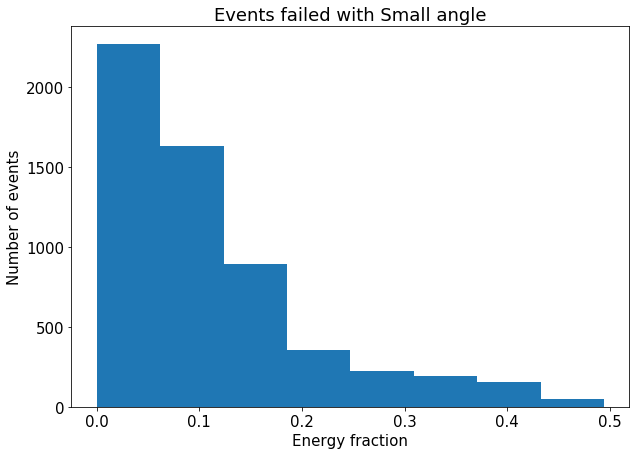

In [53]:
#fail small angle cut 
f_sac = df_particles[(df_particles['opening_angle'] < 1 ) & (df_particles['nS2'] == 1) & (df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178) & (df_particles['reco_numb_of_tracks'] == 1) & (df_particles['reco_ovlp_blob_energy'] == 0.0) & (df_particles['reco_eblob2']*1000 < 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]

hist_small_fail = f_sac.groupby('event')['kin_energy'].min()/f_sac.groupby('event')['evt_energy'].min() ##f_sac['kin_energy']/f_sac['evt_energy']

value_list_3 = hist_small_fail.tolist()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
plt.title('Events failed with Small angle')

x = [value_list_3]
plt.ylabel('Number of events')
plt.xlabel('Energy fraction')
plt.hist(x, bins = 8)
plt.savefig('Events failed with small angle.png', dpi=300, bbox_inches='tight')
plt.show()


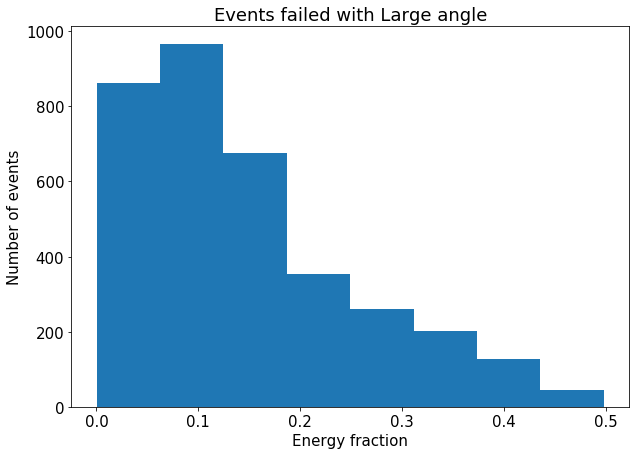

In [54]:
#fail large angle cut 
f_lac = df_particles[(df_particles['opening_angle'] > 2.7 ) & (df_particles['nS2'] == 1) & (df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178) & (df_particles['reco_numb_of_tracks'] == 1) & (df_particles['reco_ovlp_blob_energy'] == 0.0) & (df_particles['reco_eblob2']*1000 < 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]

hist_large_fail = f_lac.groupby('event')['kin_energy'].min()/f_lac.groupby('event')['evt_energy'].min() ##f_lac['kin_energy']/f_lac['evt_energy']

value_list_4 = hist_large_fail.tolist()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
plt.title('Events failed with Large angle')

x = [value_list_4]
plt.ylabel('Number of events')
plt.xlabel('Energy fraction')
plt.hist(x, bins = 8)
plt.savefig('Events failed with Large angle.png', dpi=300, bbox_inches='tight')
plt.show()


In [49]:
## the events below correspond to the events that passed the cut below. 


## .iloc[160:190] corresponds to the events that are being displayed. since there are so many events to go through,
## the display only displays a certain amount of events.
## in order to change the events displayed, change the first number and the second number.
## the first number corrresponds to where the display starts and the second number corresponds to where the display ends


df_particles[(df_particles['opening_angle'] < 1 ) & (df_particles['event'] < 1000) & (df_particles['nS2'] == 1) & (df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178) & (df_particles['reco_numb_of_tracks'] == 1) & (df_particles['reco_ovlp_blob_energy'] == 0.0) & (df_particles['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))] [['opening_angle', 'event']].iloc[0:60]
             
##list of all events that pass        ## >2.7 means with more than 2.7 rad angle, < 1 means with less than 1 rad angle    
             
             
             
             

,opening_angle,event
633794,0.636208,90
633795,0.636208,90
634418,0.767116,406
634419,0.767116,406
634664,0.428380,530
634665,0.428380,530
634770,0.696334,584
634771,0.696334,584
634798,0.905650,598
634799,0.905650,598


In [50]:
df_particles[(df_particles['opening_angle'] > 2.5 ) & (df_particles['event'] < 1000) & (df_particles['nS2'] == 1) & (df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178) & (df_particles['reco_numb_of_tracks'] == 1) & (df_particles['reco_ovlp_blob_energy'] == 0.0) & (df_particles['reco_eblob2']*1000 < 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))] [['opening_angle', 'event']]
             
         
##list of events that DIDNT pass the energy blob cut             
             
             
             

,opening_angle,event
634146,2.561057,269
634147,2.561057,269
634462,2.588390,429
634463,2.588390,429
634694,2.916588,545
634695,2.916588,545
634698,2.647069,547
634699,2.647069,547
634866,2.564379,634
634867,2.564379,634
